# Junk and health food classifier

## Purpose

The purpose of this article is to create a classifier using Artificial Intelligence to distinguish between Health and junk food. For the neural network, I'm going to utilize the fast.ai framework, and for the dataset, I'll be using the DuckDuckGo Search library to download the images.

## Part 1: Collecting the data

The first step in building our model is to collect the data. Here, we will import the library that can assist us with this task.

In [1]:
from duckduckgo_search import ddg_images
from fastcore.all import *

Now, the function that provide a list of URL's images

In [2]:
def search_images(term, max_images=200): 
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [3]:
urls = search_images('Health Food Image', max_images=1)
urls[0]

/home/rafael/workEnv/fastaiOnCampus/nbs/.venv/lib/python3.10/site-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/home/rafael/workEnv/fastaiOnCampus/nbs/.venv/lib/python3.10/site-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/home/rafael/workEnv/fastaiOnCampus/nbs/.venv/lib/python3.10/site-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


'https://awhealthcare.com/wp-content/uploads/2016/09/Healthy-Food.jpeg'

We need to download the images, so we are going to use the fastdownload function from the fast.ai library.

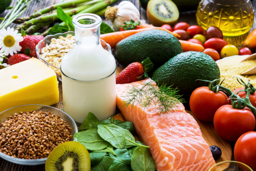

In [4]:
from fastdownload import download_url
from fastai.vision.all import *

dest = 'health.jpg'
download_url(urls[0], dest, show_progress=True)

img01 = Image.open(dest)
img01.to_thumb(256, 256)

With everything working well, let's proceed to download the dataset.

In [5]:
from time import sleep

searchs = 'health', 'junk'
path = Path('src')

for search in searchs:
    dest = (path/search)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{search} food images'))
    sleep(10)
    download_images(dest, urls=search_images(f'{search} food restaurant images'))
    sleep(10)
    download_images(dest, urls=search_images(f'{search} food plate images'))
    sleep(10)
    resize_images(path/search, max_size=400, dest=path/search)

/home/rafael/workEnv/fastaiOnCampus/nbs/.venv/lib/python3.10/site-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/home/rafael/workEnv/fastaiOnCampus/nbs/.venv/lib/python3.10/site-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/home/rafael/workEnv/fastaiOnCampus/nbs/.venv/lib/python3.10/site-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")
/home/rafael/workEnv/fastaiOnCampus/nbs/.venv/lib/python3.10/site-packages/PIL/Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/rafael/workEnv/fastaiOnCampus/nbs/.venv/lib/python3.10/site-packages/PIL/Image.py:970: UserWarning: Palette images with Trans

We also need to check if any files are corrupted or unsuitable for use.

In [6]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

18

## Part 2: Train our model

a

/home/rafael/workEnv/fastaiOnCampus/nbs/.venv/lib/python3.10/site-packages/fastai/data/transforms.py:225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(col):


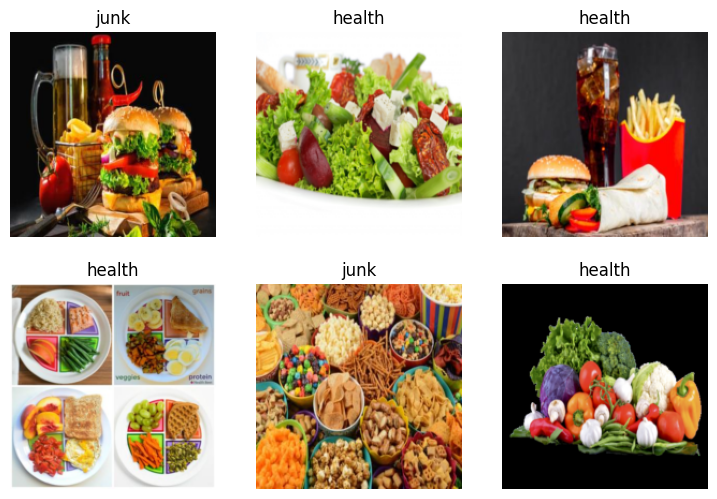

In [7]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.1),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

In [8]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

/home/rafael/workEnv/fastaiOnCampus/nbs/.venv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/rafael/workEnv/fastaiOnCampus/nbs/.venv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.051924,0.798526,0.309524,00:07


epoch,train_loss,valid_loss,error_rate,time
0,0.510439,0.394613,0.214286,00:13
1,0.384280,0.261780,0.095238,00:12
2,0.281257,0.153704,0.047619,00:13
3,0.210759,0.125572,0.047619,00:12
4,0.172987,0.123674,0.047619,00:13
